In [178]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# Guided Example - EURO US vs EURO Exchange

We are looking at the EURO: US dollar to EURO exchange rate from the time perios 2010 to 2020,
aka, Dollar Exchange US to EURO, DEXUSEU.

In [179]:
TITLE = 'DEXUSEU'
sp_data = pd.read_csv('FRED_US_Euro_ExchangeRate_2010_to_2020.csv')

# Convert DEXUSEU to a number, with coersion to throw NA's if conversion not possible
sp_data['exchange_rate'] = pd.to_numeric(sp_data.DEXUSEU, errors='coerce')

# Remove NA's
sp_data.dropna(inplace=True)
type(sp_data.DATE[0])

str

In [180]:
sp_data.head()

,DATE,DEXUSEU,exchange_rate
0,2010-05-24,1.2406,1.2406
1,2010-05-25,1.2279,1.2279
2,2010-05-26,1.2224,1.2224
3,2010-05-27,1.2370,1.2370
4,2010-05-28,1.2369,1.2369


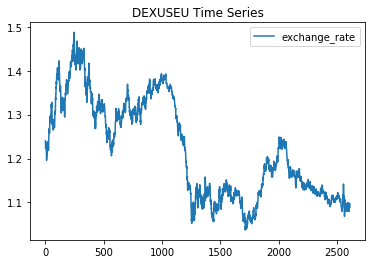

In [181]:
sp_data.plot()
plt.title('{} Time Series'.format(TITLE))
plt.show()

So, now we have a time series of exchange rate data. Our x-axis doesn't make much sense, though. How could we fix that?

Let's use pandas to create a date based index.

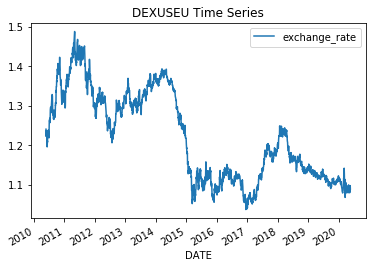

In [182]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('{} Time Series'.format(TITLE))
plt.show()

That's better. Now we have a sense of the amount of time actually covered by our time series. As we discussed previously, however, we need a stationary data set. This looks as though it might have a trend to it, so let's try plotting the difference.

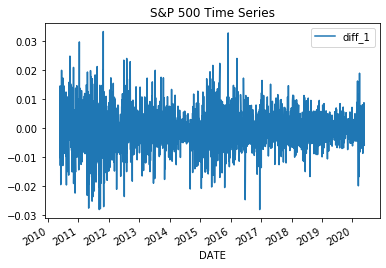

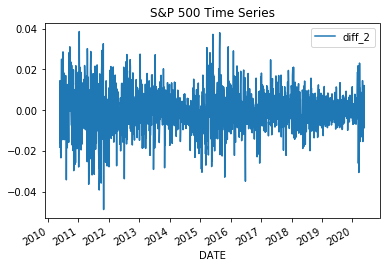

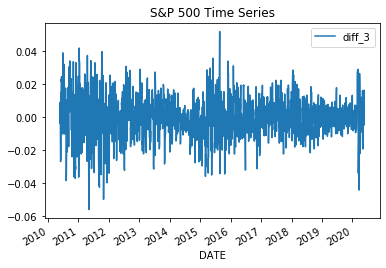

In [183]:
for i in range(1,4):
    sp_data['diff_{}'.format(i)] = sp_data.exchange_rate - sp_data.exchange_rate.shift(i)
    sp_data.plot(y='diff_{}'.format(i))
    plt.title('S&P 500 Time Series')
    plt.show()

We'll also want to investigate the PACF. Let's look at the PACF for both the initial and differenced time series.

Text(0.5, 1.0, 'DEXUSEU PACF')

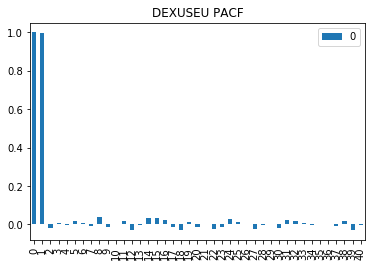

In [184]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.exchange_rate))
x_acf.plot(kind='bar')
plt.title('{} PACF'.format(TITLE))

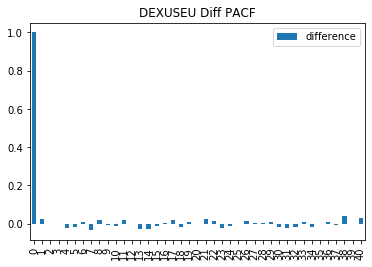

In [185]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("{} Diff PACF".format(TITLE))
plt.legend(['difference'])

Generate and interpret a PACF for the time series (and/or it's differences)
Well, the PACF for the exchange rate does not show any cycle, and looks to 
be random, no strong trend upward or downward.



In [186]:
model = ARIMA(sp_data.exchange_rate, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
xA = model_fit.aic
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:        D.exchange_rate   No. Observations:                 2503
Model:                 ARIMA(0, 1, 0)   Log Likelihood                8971.153
Method:                           css   S.D. of innovations              0.007
Date:                Thu, 28 May 2020   AIC                         -17938.306
Time:                        20:42:56   BIC                         -17926.655
Sample:                             1   HQIC                        -17934.077
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.041e-05      0.000     -0.450      0.653      -0.000       0.000
Residuals Description
count    2.503000e+03
mean     8.893972e-11
std      6.718442e-03
min     -2.803959e-02
25%     -3.589592e-03

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [187]:
model = ARIMA(sp_data.exchange_rate, order=(0,0,0))
model_fit = model.fit()
print(model_fit.summary())
xB = model_fit.aic
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:          exchange_rate   No. Observations:                 2504
Model:                     ARMA(0, 0)   Log Likelihood                1907.302
Method:                           css   S.D. of innovations              0.113
Date:                Thu, 28 May 2020   AIC                          -3810.604
Time:                        20:42:56   BIC                          -3798.953
Sample:                             0   HQIC                         -3806.375
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2210      0.002    540.845      0.000       1.217       1.225
Residuals Description
count    2.504000e+03
mean     2.586911e-09
std      1.129917e-01
min     -1.834994e-01
25%     -1.019994e-01

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [195]:
model = ARIMA(sp_data.exchange_rate, order=(2,2,2)) # was 011
model_fit = model.fit()
print(model_fit.summary())
xC = model_fit.aic
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:       D2.exchange_rate   No. Observations:                 2502
Model:                 ARIMA(2, 2, 2)   Log Likelihood                8956.380
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 28 May 2020   AIC                         -17900.759
Time:                        20:44:50   BIC                         -17865.810
Sample:                             2   HQIC                        -17888.071
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.664e-07   1.95e-06     -0.188      0.851   -4.19e-06    3.45e-06
ar.L1.D2.exchange_rate    -0.6760        nan        nan        nan         nan         nan
ar.L

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [189]:
model = ARIMA(sp_data.exchange_rate, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
xD = model_fit.aic
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:          exchange_rate   No. Observations:                 2504
Model:                     ARMA(1, 0)   Log Likelihood                8973.116
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 28 May 2020   AIC                         -17940.233
Time:                        20:42:56   BIC                         -17922.756
Sample:                             0   HQIC                        -17933.888
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2043      0.060     19.969      0.000       1.086       1.322
ar.L1.exchange_rate     0.9981      0.001    923.071      0.000       0.996       1.000
                

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [190]:
model = ARIMA(sp_data.exchange_rate, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())
xE = model_fit.aic
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.exchange_rate   No. Observations:                 2503
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8971.999
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 28 May 2020   AIC                         -17937.998
Time:                        20:42:56   BIC                         -17920.522
Sample:                             1   HQIC                        -17931.654
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.061e-05      0.000     -0.440      0.660      -0.000       0.000
ar.L1.D.exchange_rate     0.0260      0.020      1.301      0.193      -0.013       0.065
        

Text(0.5, 1.0, 'Histogram of Residuals')

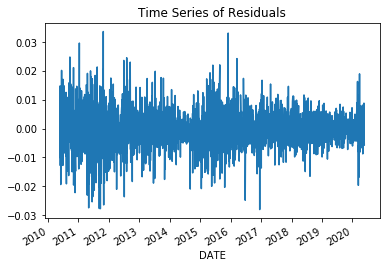

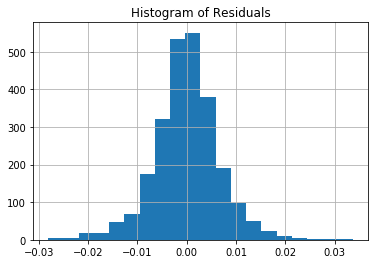

In [191]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.

### Lou's Interpretation  
#### A.  Interpret the output of ARIMA (1,1,1)  
ARIMA(1,1,1):
Constant is: 0.3529
Each day is equal to half of the previous day's value: 0.5832, and the moving average term is about: 0.66, which is increasing by 6.6 per day.

#### B.  Try some of my coefficients below:

In [192]:
# Lou's coefficients:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.exchange_rate, order=(3,2,1)) # A PI like example
model_fit = model.fit()
x321 = model_fit.aic
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D2.exchange_rate   No. Observations:                 2502
Model:                 ARIMA(3, 2, 1)   Log Likelihood                8962.964
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 28 May 2020   AIC                         -17913.928
Time:                        20:42:57   BIC                         -17878.979
Sample:                             2   HQIC                        -17901.240
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.107e-07   2.05e-07     -0.540      0.589   -5.12e-07    2.91e-07
ar.L1.D2.exchange_rate     0.0149      0.020      0.742      0.458      -0.024       0.054
ar.L

Here we are going to load the results1 list with the values from each of the runs, varying the
parameters:

p: 

In [246]:
results1 = []
a_lower_value = 0
a_upper_value = 2
b_lower_value = 0
b_upper_value = 2
c_lower_value = 0
c_upper_value = 2
for a in range(a_lower_value, a_upper_value):
    for b in range(b_lower_value, b_upper_value):
        for c in range(c_lower_value, c_upper_value):
            print("Here comes ARIMA ({},{},{})".format(a,b,c))
            model = ARIMA(sp_data.exchange_rate, order=(a,b,c))
            model_fit = model.fit()
            print(model_fit.summary())
            varname = 'x{}{}{}_aic'.format(a,b,c)
            vars()[varname] = model_fit.aic
            varname = 'x{}{}{}_llf'.format(a,b,c)
            vars()[varname] = model_fit.llf
            varname1 = vars()[varname]
            results1.append(['x{}{}{}'.format(a,b,c), model_fit.aic, model_fit.llf])
            print('Residuals Description ({},{},{}), AIC={}, Log Likelihood={}'.format(a,
                                                                               b,
                                                                               c,
                                                                               model_fit.aic,
                                                                               model_fit.llf))
            print(model_fit.resid.describe())


Here comes ARIMA (0,0,0)
                              ARMA Model Results                              
Dep. Variable:          exchange_rate   No. Observations:                 2504
Model:                     ARMA(0, 0)   Log Likelihood                1907.302
Method:                           css   S.D. of innovations              0.113
Date:                Thu, 28 May 2020   AIC                          -3810.604
Time:                        22:20:18   BIC                          -3798.953
Sample:                             0   HQIC                         -3806.375
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2210      0.002    540.845      0.000       1.217       1.225
Residuals Description (0,0,0), AIC=-3810.6042618238525, Log Likelihood=1907.3021309119263
count    2.50400

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          exchange_rate   No. Observations:                 2504
Model:                     ARMA(0, 1)   Log Likelihood                3538.066
Method:                       css-mle   S.D. of innovations              0.059
Date:                Thu, 28 May 2020   AIC                          -7070.131
Time:                        22:20:18   BIC                          -7052.654
Sample:                             0   HQIC                         -7063.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2210      0.002    529.984      0.000       1.216       1.225
ma.L1.exchange_rate     0.9586      0.004    240.520      0.000       0.951       0.966
                

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no as

                              ARMA Model Results                              
Dep. Variable:          exchange_rate   No. Observations:                 2504
Model:                     ARMA(1, 1)   Log Likelihood                8974.026
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 28 May 2020   AIC                         -17940.053
Time:                        22:20:19   BIC                         -17916.750
Sample:                             0   HQIC                        -17931.593
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2049      0.059     20.306      0.000       1.089       1.321
ar.L1.exchange_rate     0.9980      0.001    893.511      0.000       0.996       1.000
ma.L1.exchange_r

/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no as

                             ARIMA Model Results                              
Dep. Variable:        D.exchange_rate   No. Observations:                 2503
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8972.005
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 28 May 2020   AIC                         -17936.011
Time:                        22:20:19   BIC                         -17912.710
Sample:                             1   HQIC                        -17927.552
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.059e-05      0.000     -0.441      0.660      -0.000       0.000
ar.L1.D.exchange_rate    -0.0587      0.787     -0.075      0.941      -1.601       1.484
ma.L1.D.

Now, we are going to display the values of AIC, and the Log Likelihood for the 8 different
sets described above, to measure the effectiveness of the model.

In [247]:
for results0 in results1:
    print("results0 = {}".format(results0))

results0 = ['x000', -3810.6042618238525, 1907.3021309119263]
results0 = ['x001', -7070.131297339419, 3538.0656486697094]
results0 = ['x010', -17938.305964896328, 8971.152982448164]
results0 = ['x011', -17938.00500266052, 8972.00250133026]
results0 = ['x100', -17940.232892300846, 8973.116446150423]
results0 = ['x101', -17940.052739817605, 8974.026369908803]
results0 = ['x110', -17937.998138032155, 8971.999069016078]
results0 = ['x111', -17936.010963670084, 8972.005481835042]


#### Evaluating the 8 values:

A - 000 Amazingly enough, the first set of parameters, generated the optimal values
for this set, being AIC: -3801, the closes to zero, and the Log-Likelihood closest to zero,
being 1907.  Only the constant was given for this combination, and no p-values reported.

So since the auto correlation is nil, using the immediate prior gives the best correlation for the 
predictor, for both the Auto Regression, and Moving Average components.

Setting the auto-regression component to 0, and the i value to 0, as well as the d component to zer
yielded the optimal results.

The other values for the different combinations are all very similar, except for set x001, which
came in second

B - 001 Not optimal.

C - 010 Not optimal.

D - 011 Not optimal.

E - 100 Not optimal.

F - 101 Not optimal.

G - 110 Not optimal.

H - 111 Not optimal.